# [Dive into deep learning (D2L)](https://d2l.ai/index.html)

## Setup

* create a virtual environment and activate it
* install `ipykernel` to the virtual environment
* install the IPython kernel for the current user
* install `PyTorch` and `d2l`

Note: Here, multiple virtual environments are created in the same project folder. IMHO there is no way to use Poetry to create multiple pyproject.toml files. 

In [ ]:
# ! python3 -m venv d2l
# ! source d2l/bin/activate
# ! pip install ipykernel
# ! python -m ipykernel install --user --name=d2l
# ! pip install torch torchvision --index-url https://download.pytorch.org/whl/cpu
# ! pip install d2l

Verify that the correct virtual environment is used and `PyTorch` and `d2l` are installed. 

In [131]:
import sys
import torch
import numpy as np
import matplotlib
import d2l

print("Kernel:", sys.executable)
print("Python:", sys.version)
print("PyTorch:", torch.__version__)
print("d2l:", d2l.__version__)
print("numpy:", np.__version__)

print("GPU:", torch.cuda.is_available())

Kernel: /home/hendrik/Documents/repos/github/mygists/d2l/bin/python
Python: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
PyTorch: 2.3.0+cpu
d2l: 1.0.3
numpy: 1.26.3
GPU: False


## Tensor basics

* a class to store data in multidimensional arrays, supports GPU usage, automatic differentiation
* tensor consists of 1 ... n elements
* 0-D-tensor: scalar
* 1-D-tensor: vector
* 2-D-tensor: matrix
* k-D-tensor: $k_th$ order tensor

Tensor operations:

* create a tensor with the elements 0..11

In [18]:
t_flt = torch.arange(12, dtype = torch.float32)
print("Floats 0-11:", t_flt)
print("# of elements:", t_flt.numel())
print("Shape:", t_flt.shape)

Floats 0-11: tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])
# of elements: 12
Shape: torch.Size([12])


* reshape 1-D-tensor to matrix

In [20]:
t_res = t_flt.reshape(3, 4)
# same as t_flt.reshape(3, -1) in which case the second dim is inferred from the tensor size and the first dim
print(t_res)
print(t_res.shape)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])
torch.Size([3, 4])


* create a 3-D-tensor of zeros

In [21]:
torch.zeros((3, 4, 2))
# torch.ones((3, 4, 2))

tensor([[[0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.],
         [0., 0.]]])

* create a 3-D-tensor with random numbers from a normal distributio

In [22]:
torch.randn((3, 4, 2))

tensor([[[-0.0396,  0.4528],
         [ 0.1254, -0.3085],
         [-2.2919,  0.2458],
         [-1.2656,  0.9825]],

        [[-2.8795, -1.0540],
         [ 0.4578,  0.5039],
         [ 0.8956,  0.5084],
         [ 0.0063,  0.7357]],

        [[-1.7103,  2.0491],
         [-1.2332, -0.5651],
         [-0.5176,  0.3198],
         [ 1.0001, -0.7068]]])

* create a 2-D-tensor from lists of values

In [24]:
t = torch.tensor([
    [1, 2, 3, 4]
    , [10, 20, 30, 40]
    , [100, 200, 300, 400]
])

t

tensor([[  1,   2,   3,   4],
        [ 10,  20,  30,  40],
        [100, 200, 300, 400]])

* select last row
* select rows two and three

In [28]:
print(t[-1])
print(t[0:2])

tensor([100, 200, 300, 400])
tensor([[ 1,  2,  3,  4],
        [10, 20, 30, 40]])


* replace element by position

In [29]:
t[1, 2] = 35
t

tensor([[  1,   2,   3,   4],
        [ 10,  20,  35,  40],
        [100, 200, 300, 400]])

Operations:

* unary scalar operators (e.g. `torch.exp()`, `torch.log()`
* binary scalar operators using tensors of same shape
  dot products, matrix multiplications

In [32]:
torch.log(t)

tensor([[0.0000, 0.6931, 1.0986, 1.3863],
        [2.3026, 2.9957, 3.5553, 3.6889],
        [4.6052, 5.2983, 5.7038, 5.9915]])

* concatenate tensors

In [36]:
torch.cat((t, t * 2), dim = 0)

tensor([[  1,   2,   3,   4],
        [ 10,  20,  35,  40],
        [100, 200, 300, 400],
        [  2,   4,   6,   8],
        [ 20,  40,  70,  80],
        [200, 400, 600, 800]])

In [35]:
torch.cat((t, t * 2), dim = 1)

tensor([[  1,   2,   3,   4,   2,   4,   6,   8],
        [ 10,  20,  35,  40,  20,  40,  70,  80],
        [100, 200, 300, 400, 200, 400, 600, 800]])

In [38]:
t < 10

tensor([[ True,  True,  True,  True],
        [False, False, False, False],
        [False, False, False, False]])

* sum up all elements of a tensor

In [39]:
torch.cat((t, t + 2), dim = 0).sum()

tensor(2254)

* tensor broadcasting, i.e. replicating to match tensor dimensions

In [44]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [47]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

* in-place modification (i.e. w/o new memory allocation) using slice notation

In [54]:
a = torch.zeros(10)
print('pointer:', id(a))
a = a + 6
print('pointer (new):', id(a))
a += 6
print('pointer (in-place):', id(a))
a[:] = a + 5
print('pointer (in-place):', id(a))

pointer: 129589240416272
pointer (new): 129589240416752
pointer (in-place): 129589240416752
pointer (in-place): 129589240416752


* conversions from and to tensor

In [58]:
print("tensor to numpy creates a", type(a.numpy()))
print("numpy to tensor creates a", type(torch.from_numpy(a.numpy())))

tensor to numpy creates a <class 'numpy.ndarray'>
numpy to tensor creates a <class 'torch.Tensor'>


## Data processing

* pandas basics (import, separate target and inputs/features, imputation, binarization)
* conversion to tensor

## Linear algebra

### Scalars

### Vectors

### Matrices

In [61]:
A = torch.arange(6).reshape(3, -1)
A

tensor([[0, 1],
        [2, 3],
        [4, 5]])

* transpose matrix 

In [62]:
A.T

tensor([[0, 2, 4],
        [1, 3, 5]])

In [ ]:
* symmetric matrix

In [64]:
A = torch.tensor([
    [1, 2, 3]
    , [2, 0, 4]
    , [3, 4, 5]
])
A == A.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

### Tensors

In [66]:
T = torch.arange(24).reshape(2, 3, 4)
T.shape

torch.Size([2, 3, 4])

### Tensor arithmetic

* operations with a scalar 

In [88]:
A = torch.arange(12, dtype = torch.float32).reshape(3, 4)
A, A + 2, A * 2

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]),
 tensor([[ 2.,  3.,  4.,  5.],
         [ 6.,  7.,  8.,  9.],
         [10., 11., 12., 13.]]),
 tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.]]))

* elementwise operations

In [89]:
B = A.clone()
A, A + B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]),
 tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.]]))

* elementwise product (Hadamard product)

In [90]:
A, A * B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]),
 tensor([[  0.,   1.,   4.,   9.],
         [ 16.,  25.,  36.,  49.],
         [ 64.,  81., 100., 121.]]))

### Reduction and non-reduction

* reduction, i.e. reduce a tensor along some or all axes

In [91]:
A, A.shape, A.sum() # equivalent to A.sum(axis = [0, 1])

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]),
 torch.Size([3, 4]),
 tensor(66.))

In [92]:
A, A.shape, A.sum(axis = 1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]),
 torch.Size([3, 4]),
 tensor([ 6., 22., 38.]))

In [93]:
A, A.shape, A.mean(axis = 1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]),
 torch.Size([3, 4]),
 tensor([1.5000, 5.5000, 9.5000]))

* non-reduction operations, e.g. for normalization by row / col or cumsum

In [94]:
A, A.sum(axis = 0, keepdim = True)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]),
 tensor([[12., 15., 18., 21.]]))

In [97]:
A, A / A.sum(axis = 1, keepdim = True)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]),
 tensor([[0.0000, 0.1667, 0.3333, 0.5000],
         [0.1818, 0.2273, 0.2727, 0.3182],
         [0.2105, 0.2368, 0.2632, 0.2895]]))

In [98]:
A, A / A.sum(axis = 0, keepdim = True)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]),
 tensor([[0.0000, 0.0667, 0.1111, 0.1429],
         [0.3333, 0.3333, 0.3333, 0.3333],
         [0.6667, 0.6000, 0.5556, 0.5238]]))

In [101]:
A, A.cumsum(dim = 1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]),
 tensor([[ 0.,  1.,  3.,  6.],
         [ 4.,  9., 15., 22.],
         [ 8., 17., 27., 38.]]))

### Dot products

* vector-vector product

In [105]:
x = torch.arange(3, dtype = torch.float32)
y = torch.ones(3, dtype = torch.float32) * 2
x, y, torch.dot(x, y)

(tensor([0., 1., 2.]), tensor([2., 2., 2.]), tensor(6.))

* matrix-vector product

In [109]:
w = torch.tensor([1, 2, 3, 4], dtype = torch.float32)
A, w

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]),
 tensor([1., 2., 3., 4.]))

In [111]:
A.shape, w.shape, torch.mv(A, w) # equivalent to A@w

(torch.Size([3, 4]), torch.Size([4]), tensor([ 20.,  60., 100.]))

* matrix-matrix product

In [114]:
B = A.T
torch.mm(A, B) # equivalent to A@B

tensor([[ 14.,  38.,  62.],
        [ 38., 126., 214.],
        [ 62., 214., 366.]])

### Norms

* norm of a vector indicates its size (length)
* L2 norm is Euclidean distance

In [124]:
t = torch.tensor([3., 4.])
t.norm(), t.norm() == torch.sqrt(torch.tensor(3. ** 2. + 4. ** 2))

(tensor(5.), tensor(True))

* L1 norm is Manhattan distance

In [126]:
t.abs().sum()

tensor(7.)

## Calculus

Derivative for function f(x) indicates rate of change in case of small changes to x.

In [144]:
from d2l import torch as d2l

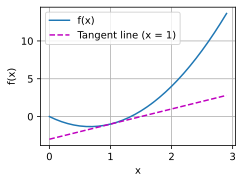

In [148]:
def f(x):
    return 3 * x ** 2 - 4 * x

x = np.arange(0, stop = 3, step = 0.1)
d2l.plot(
    x
    , Y = [f(x), 2 * x - 3]
    , xlabel = 'x'
    , ylabel = 'f(x)'
    , legend = ['f(x)', 'Tangent line (x = 1)']
)

In [ ]:
d2l.plot()